<a href="https://colab.research.google.com/github/princeprakash24/Online_Poll_Result_Analyzer/blob/main/Online_Poll_Result_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [37]:
df = pd.read_csv("/content/poll_dataset.csv")

converting stringified lists into python lists(if needed)

In [33]:
df["Options"] = df["Options"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df["Responses"] = df["Responses"].apply(lambda x: eval(x) if isinstance(x, str) else x)

Functional component

In [34]:
def analyze_poll(question, options, responses):
  result_df = pd.DataFrame({"Option": options, "Votes": responses})
  result_df["Percentage"] = (result_df["Votes"] / result_df["Votes"].sum() * 100).round(2)
  result_df = result_df.sort_values(by="Votes", ascending=False).reset_index(drop=True)
  winner = result_df.iloc[0]["Option"]
  return result_df, winner

Plotting different charts

In [35]:
def plot_charts(question, result_df):

  plt.figure(figsize=(5, 5))
  plt.pie(result_df["Votes"], labels=result_df["Option"], autopct="%1.1f%%", startangle=90)
  plt.title(f"{question} - Pie Chart")
  plt.show()

  plt.figure(figsize=(6, 4))
  plt.bar(result_df["Option"], result_df["Votes"], color="skyblue")
  plt.title(f"{question} - Bar Chart")
  plt.xlabel("Options")
  plt.ylabel("Votes")
  plt.show()

Main execution


Question: Preferred Learning Mode
    Option  Votes  Percentage
0   Online     45        45.0
1   Hybrid     30        30.0
2  Offline     25        25.0
Winner: Online


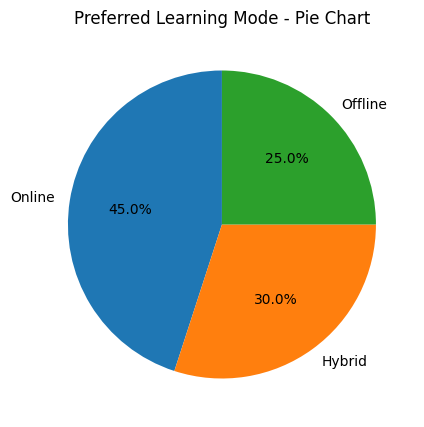

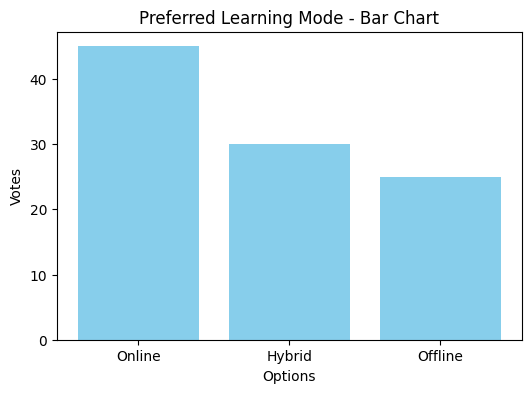


Question: Best Programming Language
       Option  Votes  Percentage
0      Python     60        60.0
1        Java     20        20.0
2         C++     10        10.0
3  JavaScript     10        10.0
Winner: Python


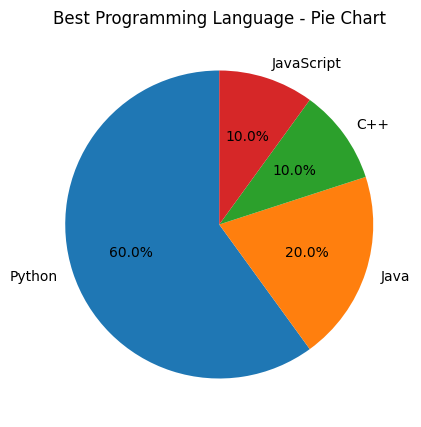

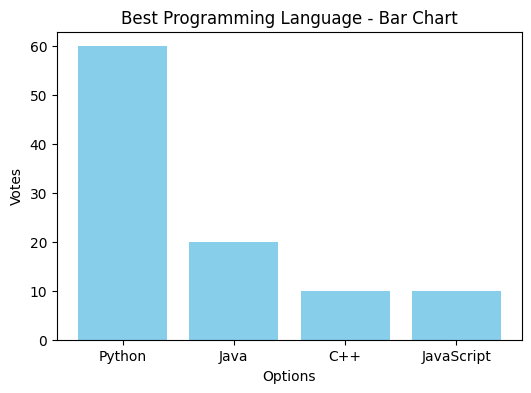


Question: Favorite Fruit
   Option  Votes  Percentage
0   Apple     35        35.0
1  Banana     25        25.0
2   Mango     20        20.0
3  Orange     20        20.0
Winner: Apple


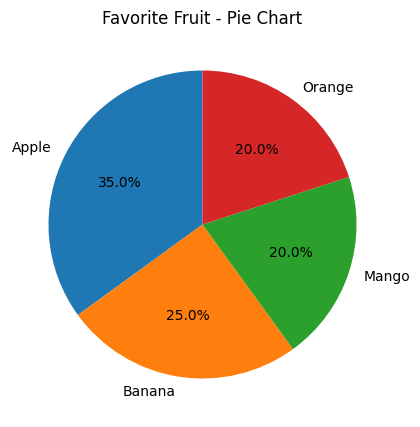

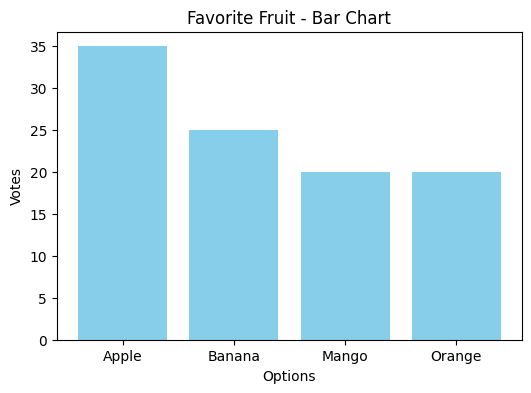

In [36]:
for idx, row in df.iterrows():
  question = row["Question"]
  options = row["Options"]
  responses = row["Responses"]


  result_df, winner = analyze_poll(question, options, responses)
  print("\nQuestion:", question)
  print(result_df)
  print("Winner:", winner)
  plot_charts(question, result_df)